# Pretrain Fine

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re

from plotting_analysis_funcs import *

/var/folders/by/b05bkcn50tb0fx4h3hhz0h800000gn/T/ipykernel_60088/2426438369.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## ResNeXt50

train history

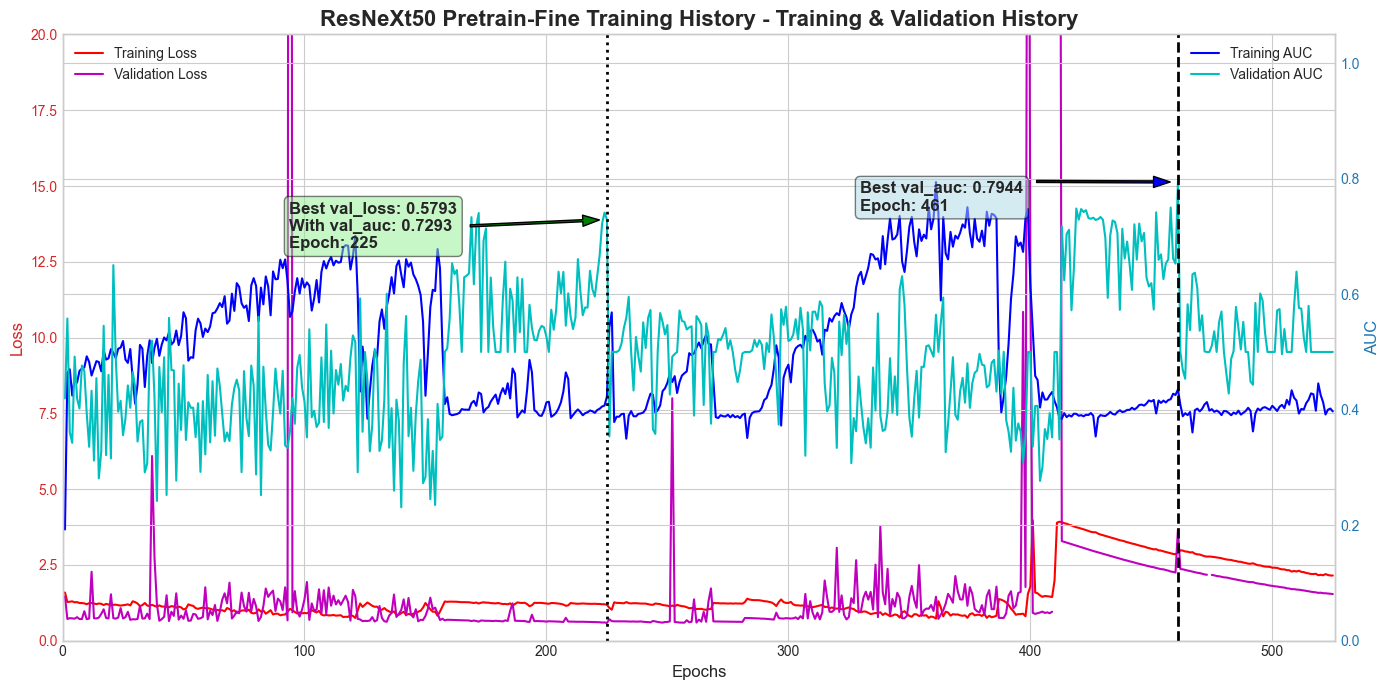

Training History Analysis for: 'ResNeXt50 Pretrain-Fine Training History'
Total Epochs Trained: 525
--------------------------------------------------
Lowest Validation Loss of 0.5793 achieved at Epoch 225.
Validation AUC at this epoch was 0.7293.
--------------------------------------------------
Highest Validation AUC of 0.7944 achieved at Epoch 461.
Validation Loss at this epoch was 3.6623.


In [2]:
path_to_resnext50_pretrain_fine_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/pretrain_fine/resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_normal_run_2025_10_19_12_37_29/history_resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_normal_run_2025_10_19_12_37_29.npy')

plot_training_history(path_to_train_history = path_to_resnext50_pretrain_fine_train_history,
                      title = 'ResNeXt50 Pretrain-Fine Training History',
                      custom_loss_limit = 20,
                      compare_metric = "auc")

I'll take it, not great, but I don't know which parameters I should adjust to improve it

Learning Rate for weighted training

Epochs: 400
Lowest loss 2.1244 at learning rate 9.61e-02


0.09605058

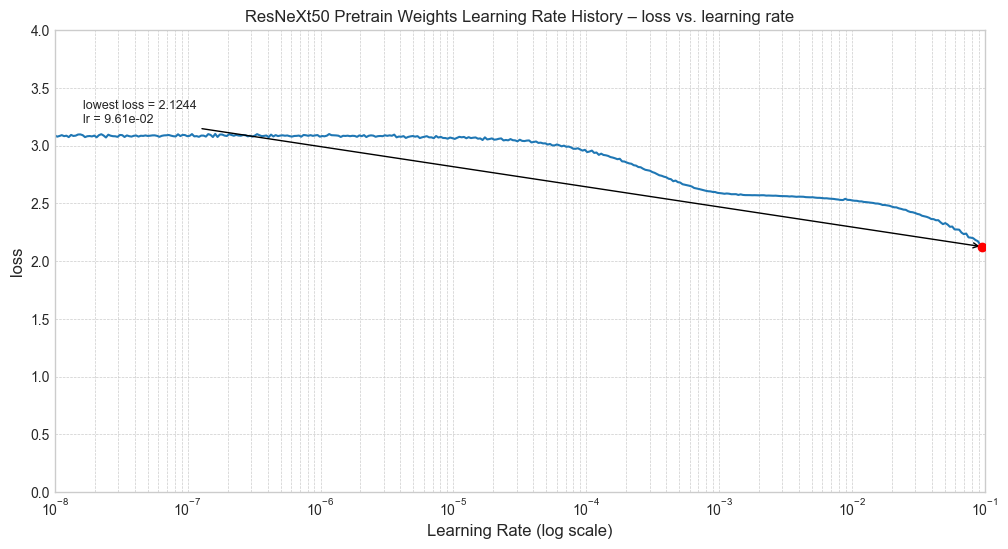

In [3]:
path_to_resnext50_pretrain_weights_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/pretrain_fine/resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_10_21_07_55_53/history_resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_10_21_07_55_53.npy')

plot_lr_history(path_to_train_history = path_to_resnext50_pretrain_weights_learning_rate,
                title = 'ResNeXt50 Pretrain Weights Learning Rate History',
                y_axis_max = 4)

I'll pick 2 x 10^-2 (0.02)

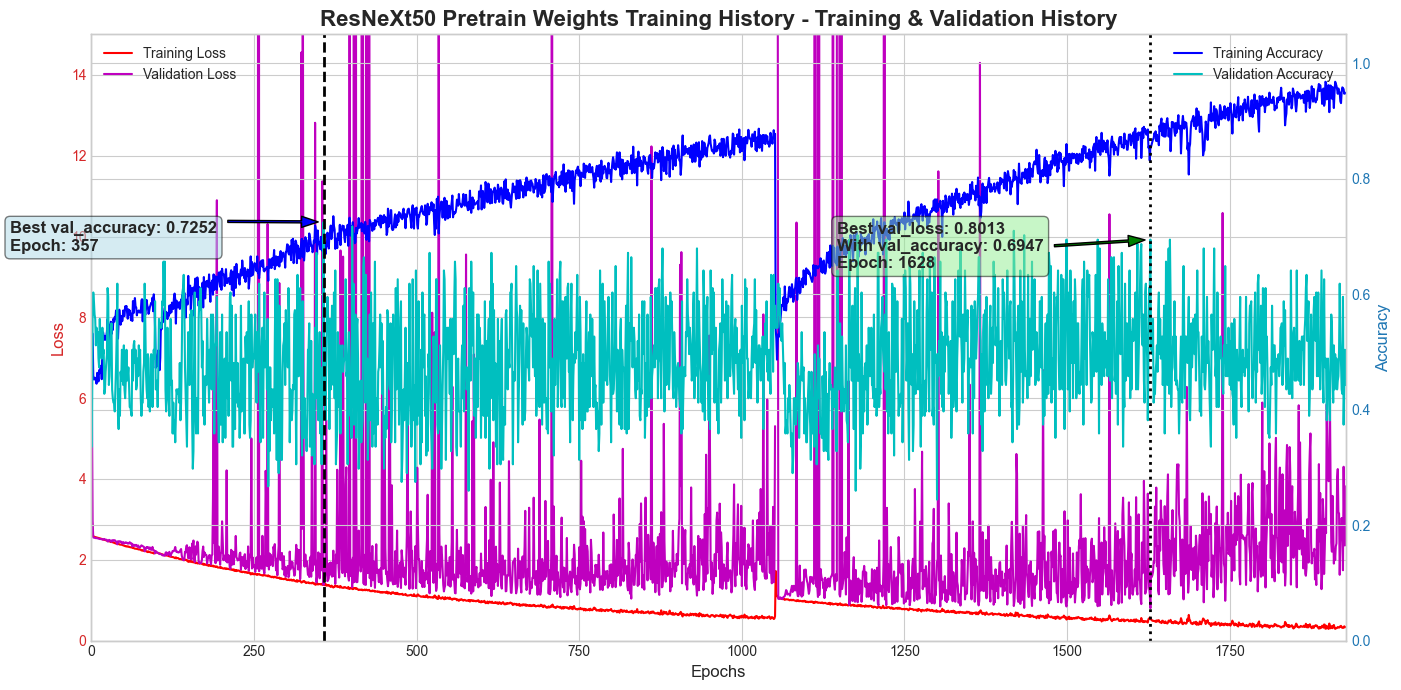

Training History Analysis for: 'ResNeXt50 Pretrain Weights Training History'
Total Epochs Trained: 1928
--------------------------------------------------
Lowest Validation Loss of 0.8013 achieved at Epoch 1628.
Validation Accuracy at this epoch was 0.6947.
--------------------------------------------------
Highest Validation Accuracy of 0.7252 achieved at Epoch 357.
Validation Loss at this epoch was 1.3786.


In [4]:
path_to_resnext50_pretrain_weights_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/pretrain_fine/resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_22_11_06_53/history_resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_22_11_06_53.npy')

plot_training_history(path_to_train_history = path_to_resnext50_pretrain_weights_train_history,
                      title = 'ResNeXt50 Pretrain Weights Training History',
                      custom_loss_limit = 15)

Feels pretty jumpy, I'll try out a dropout rate of 0.45

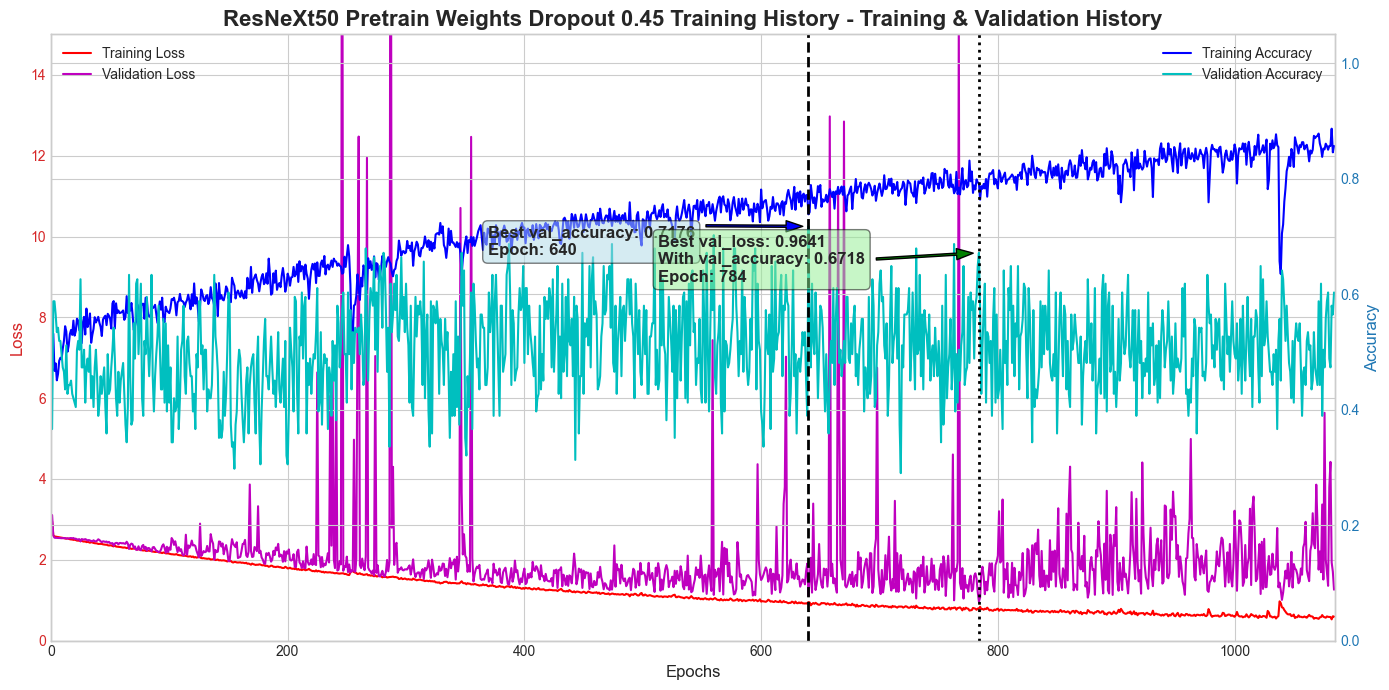

Training History Analysis for: 'ResNeXt50 Pretrain Weights Dropout 0.45 Training History'
Total Epochs Trained: 1084
--------------------------------------------------
Lowest Validation Loss of 0.9641 achieved at Epoch 784.
Validation Accuracy at this epoch was 0.6718.
--------------------------------------------------
Highest Validation Accuracy of 0.7176 achieved at Epoch 640.
Validation Loss at this epoch was 1.1017.


In [5]:
path_to_resnext50_pretrain_weights_dropout_045_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/pretrain_fine/resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_23_17_43_14/history_resnext50_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_23_17_43_14.npy')

plot_training_history(path_to_train_history = path_to_resnext50_pretrain_weights_dropout_045_train_history,
                      title = 'ResNeXt50 Pretrain Weights Dropout 0.45 Training History',
                      custom_loss_limit = 15)

Feels more stable than the previous run, even though it has a lower performance. I'll use the dropout for the k-fold

# ResNeXt101

learning rate

Epochs: 400
Lowest loss 8.1940 at learning rate 9.61e-02


0.09605058

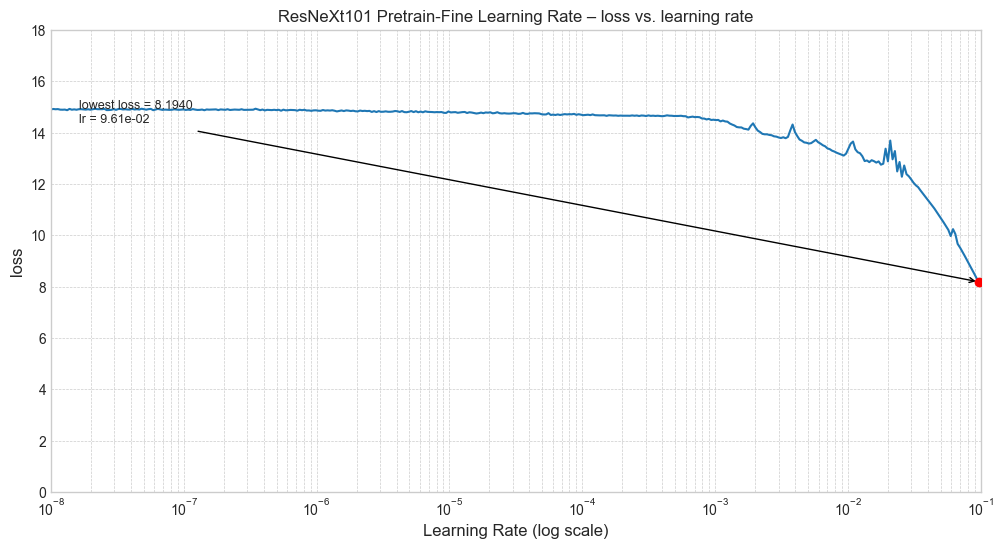

In [6]:
path_to_resnext101_pretrain_fine_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/pretrain_fine/resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_23_02_28/history_resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_23_02_28.npy')

plot_lr_history(path_to_resnext101_pretrain_fine_learning_rate, 'ResNeXt101 Pretrain-Fine Learning Rate', 18)

I'll pick 3 x 10^-2 (0.03)

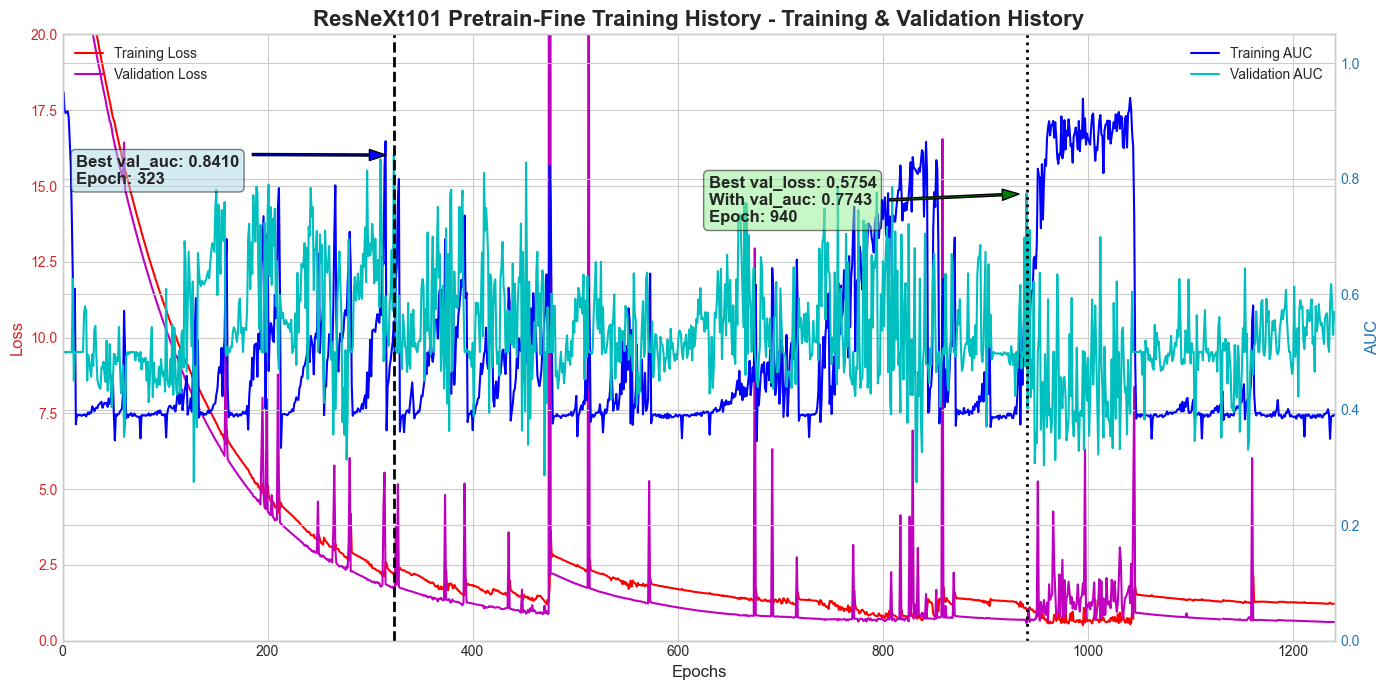

Training History Analysis for: 'ResNeXt101 Pretrain-Fine Training History'
Total Epochs Trained: 1240
--------------------------------------------------
Lowest Validation Loss of 0.5754 achieved at Epoch 940.
Validation AUC at this epoch was 0.7743.
--------------------------------------------------
Highest Validation AUC of 0.8410 achieved at Epoch 323.
Validation Loss at this epoch was 1.6924.


In [7]:
path_to_resnext101_pretrain_fine_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/pretrain_fine/resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_normal_run_2025_10_19_15_17_45/history_resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_normal_run_2025_10_19_15_17_45.npy')

plot_training_history(path_to_train_history = path_to_resnext101_pretrain_fine_train_history,
                      title = 'ResNeXt101 Pretrain-Fine Training History',
                      custom_loss_limit = 20,
                      compare_metric = "auc")

I'll use this training for the pretrained weights

Learning Rate for weighted Training

Epochs: 400
Lowest loss 1.3901 at learning rate 9.61e-02


0.09605058

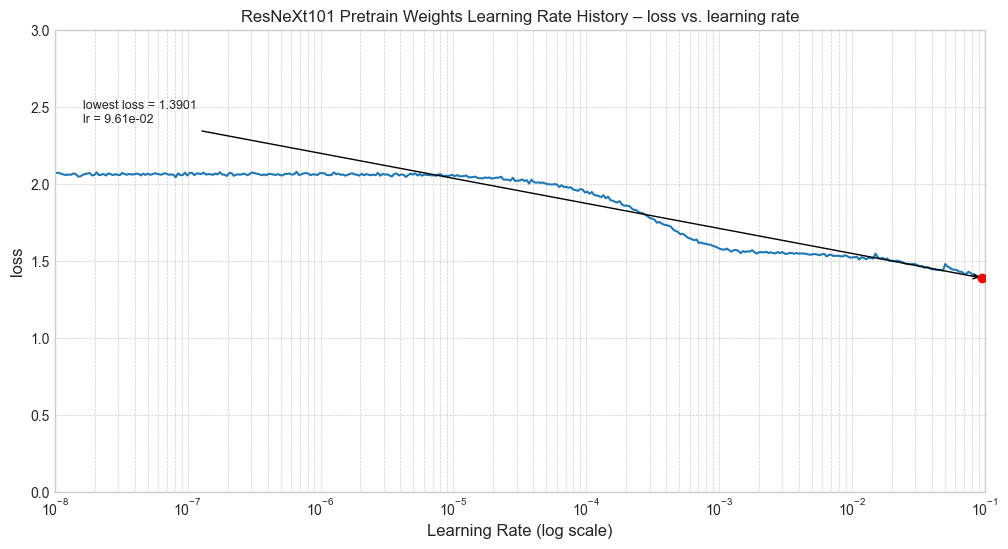

In [8]:
path_to_resnext101_pretrain_weights_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/pretrain_fine/resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_10_21_08_51_59/history_resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_10_21_08_51_59.npy')

plot_lr_history(path_to_train_history = path_to_resnext101_pretrain_weights_learning_rate,
                title = 'ResNeXt101 Pretrain Weights Learning Rate History',
                y_axis_max = 3)

I'll also pick 2 x 10^-2 (0.02)

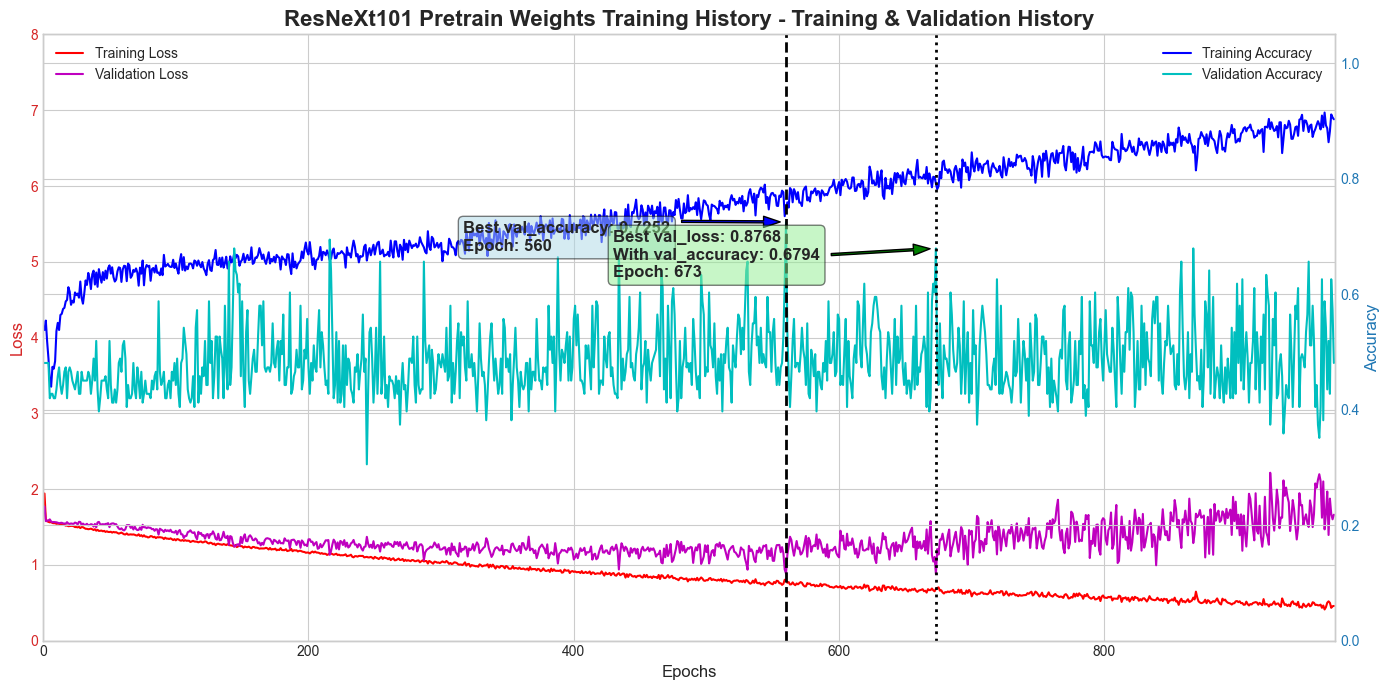

Training History Analysis for: 'ResNeXt101 Pretrain Weights Training History'
Total Epochs Trained: 973
--------------------------------------------------
Lowest Validation Loss of 0.8768 achieved at Epoch 673.
Validation Accuracy at this epoch was 0.6794.
--------------------------------------------------
Highest Validation Accuracy of 0.7252 achieved at Epoch 560.
Validation Loss at this epoch was 0.8838.


In [17]:
path_to_resnext101_pretrain_weights_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/pretrain_fine/resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_22_15_21_21/history_resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_22_15_21_21.npy')

plot_training_history(path_to_train_history = path_to_resnext101_pretrain_weights_train_history,
                      title = 'ResNeXt101 Pretrain Weights Training History',
                      custom_loss_limit = 8)

relatively solid training, but still overfitting. Increase dropout to 0.45

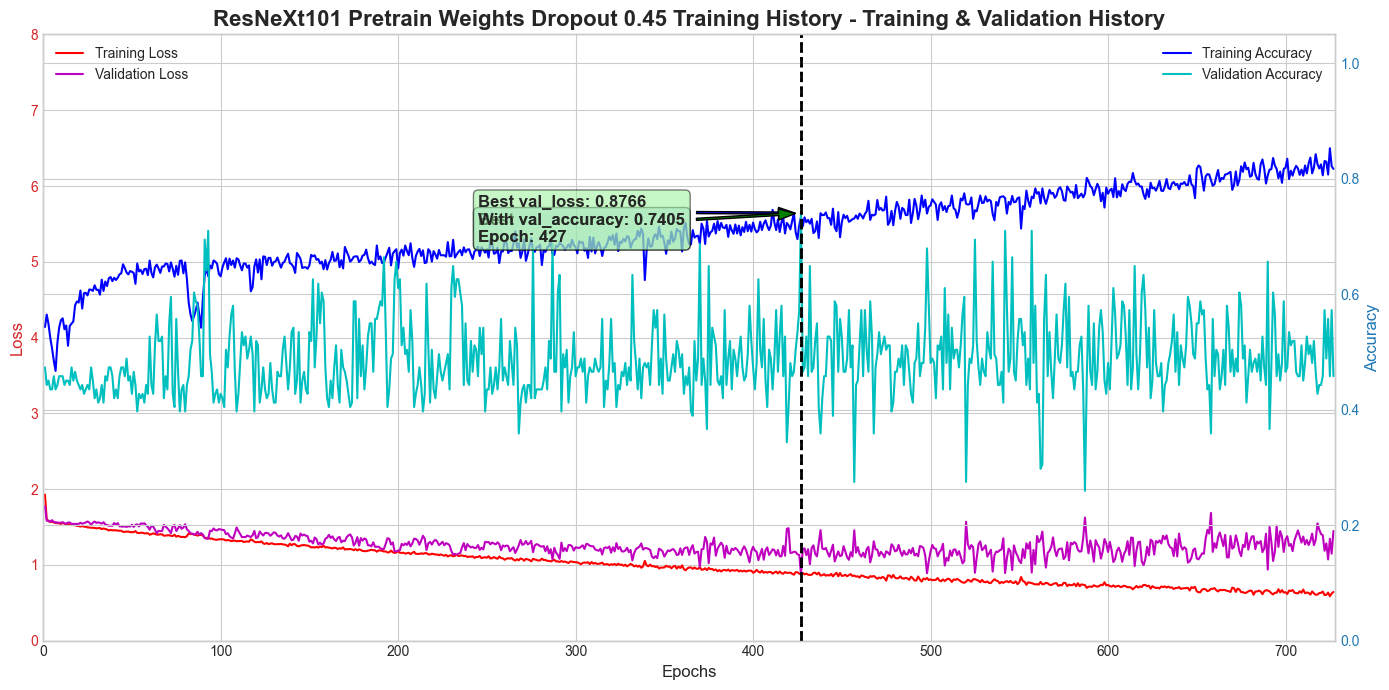

Training History Analysis for: 'ResNeXt101 Pretrain Weights Dropout 0.45 Training History'
Total Epochs Trained: 727
--------------------------------------------------
Lowest Validation Loss of 0.8766 achieved at Epoch 427.
Validation Accuracy at this epoch was 0.7405.
--------------------------------------------------
Highest Validation Accuracy of 0.7405 achieved at Epoch 427.
Validation Loss at this epoch was 0.8766.


In [18]:
path_to_resnext101_pretrain_weights_dropout_045_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/pretrain_fine/resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_23_20_07_01/history_resnext101_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_23_20_07_01.npy')

plot_training_history(path_to_train_history = path_to_resnext101_pretrain_weights_dropout_045_train_history,
                      title = 'ResNeXt101 Pretrain Weights Dropout 0.45 Training History',
                      custom_loss_limit = 8)

Better than before, I'll pick a dropout of 0.45 for the k-fold training.

# ResNet152

learning rate

Epochs: 400
Lowest loss 9.3387 at learning rate 9.61e-02


0.09605058

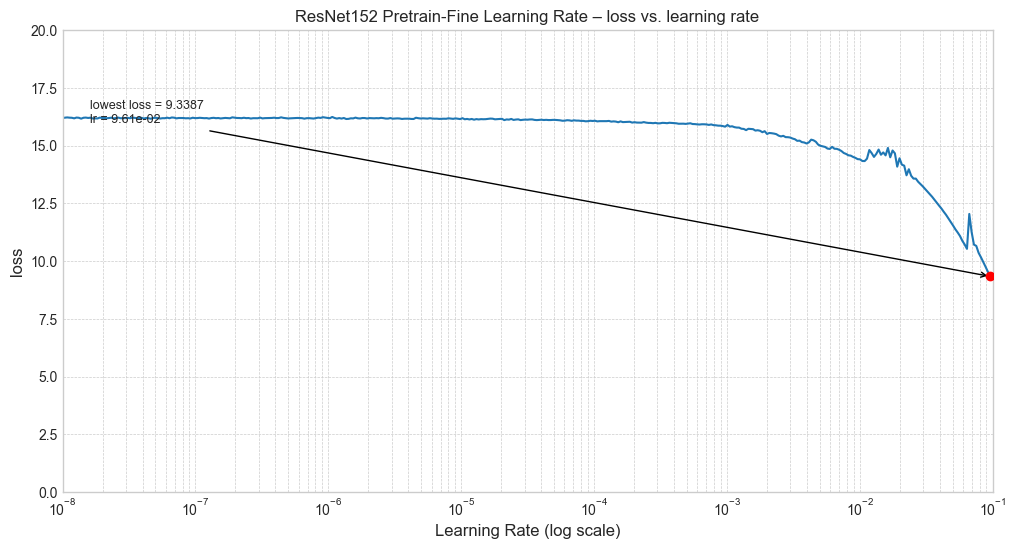

In [10]:
path_to_resnet152_pretrain_fine_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/pretrain_fine/resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_19_39_20/history_resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_lr_run_2025_10_16_19_39_20.npy')

plot_lr_history(path_to_resnet152_pretrain_fine_learning_rate, 'ResNet152 Pretrain-Fine Learning Rate', 20)

I'll pick 10^-2

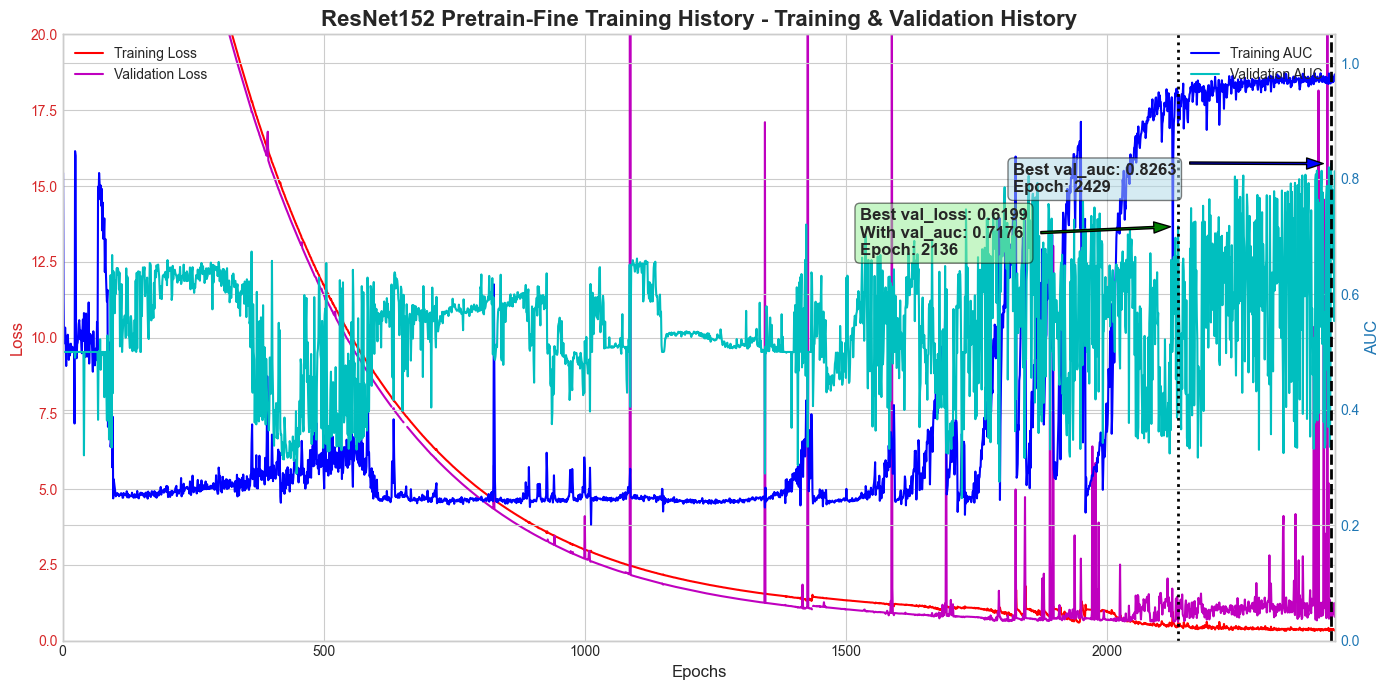

Training History Analysis for: 'ResNet152 Pretrain-Fine Training History'
Total Epochs Trained: 2436
--------------------------------------------------
Lowest Validation Loss of 0.6199 achieved at Epoch 2136.
Validation AUC at this epoch was 0.7176.
--------------------------------------------------
Highest Validation AUC of 0.8263 achieved at Epoch 2429.
Validation Loss at this epoch was 0.6851.


In [11]:
path_to_resnet152_pretrain_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/pretrain_fine/resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_normal_run_2025_10_18_16_28_38/history_resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_pretrain_fine_normal_run_2025_10_18_16_28_38.npy')

plot_training_history(path_to_train_history = path_to_resnet152_pretrain_train_history,
                      title = 'ResNet152 Pretrain-Fine Training History',
                      custom_loss_limit = 20,
                      compare_metric = "auc")

I'll use this training for the pretrained weights

Learning rate for weighted Training

Epochs: 400
Lowest loss 1.0486 at learning rate 9.23e-02


0.09225714

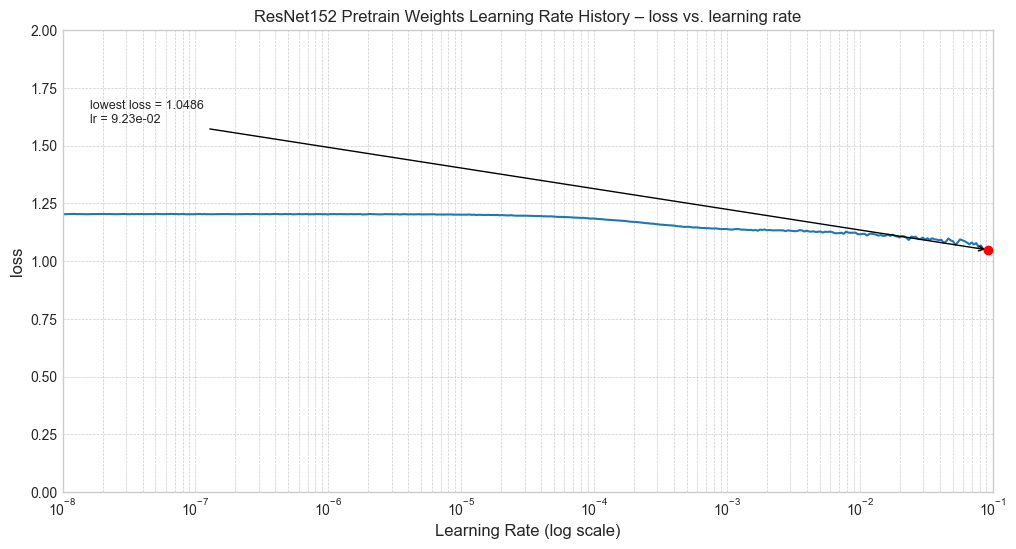

In [12]:
path_to_resnet152_pretrain_weights_learning_rate = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/pretrain_fine/resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_10_21_06_20_52/history_resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_lr_run_2025_10_21_06_20_52.npy')

plot_lr_history(path_to_train_history = path_to_resnet152_pretrain_weights_learning_rate,
                title = 'ResNet152 Pretrain Weights Learning Rate History',
                y_axis_max = 2)

That looks not too great, I'll go with 1 x 10^-2 (0.01)

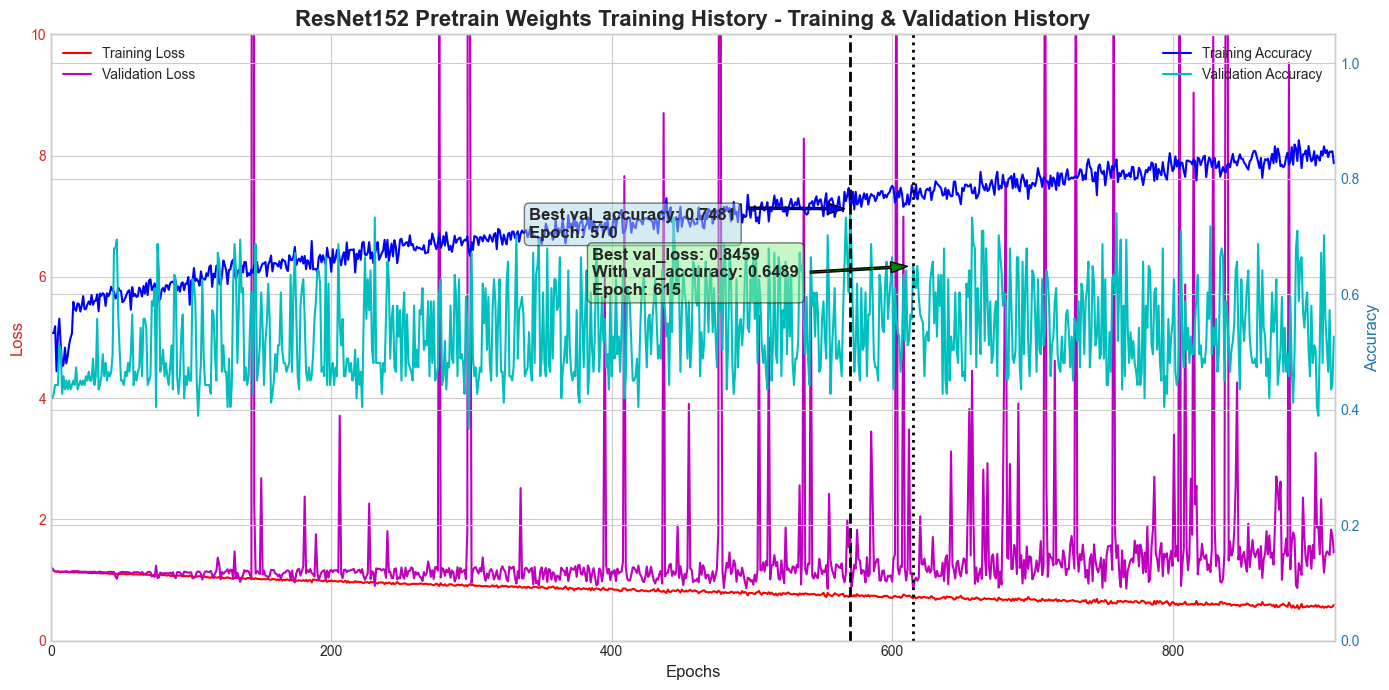

Training History Analysis for: 'ResNet152 Pretrain Weights Training History'
Total Epochs Trained: 915
--------------------------------------------------
Lowest Validation Loss of 0.8459 achieved at Epoch 615.
Validation Accuracy at this epoch was 0.6489.
--------------------------------------------------
Highest Validation Accuracy of 0.7481 achieved at Epoch 570.
Validation Loss at this epoch was 1.8453.


In [20]:
path_to_resnet152_pretrain_weights_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/pretrain_fine/resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_22_07_35_54/history_resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_22_07_35_54.npy')

plot_training_history(path_to_train_history = path_to_resnet152_pretrain_weights_train_history,
                      title = 'ResNet152 Pretrain Weights Training History',
                      custom_loss_limit = 10)

Also pretty solid, but also overfitting, increase dropout to 0.45

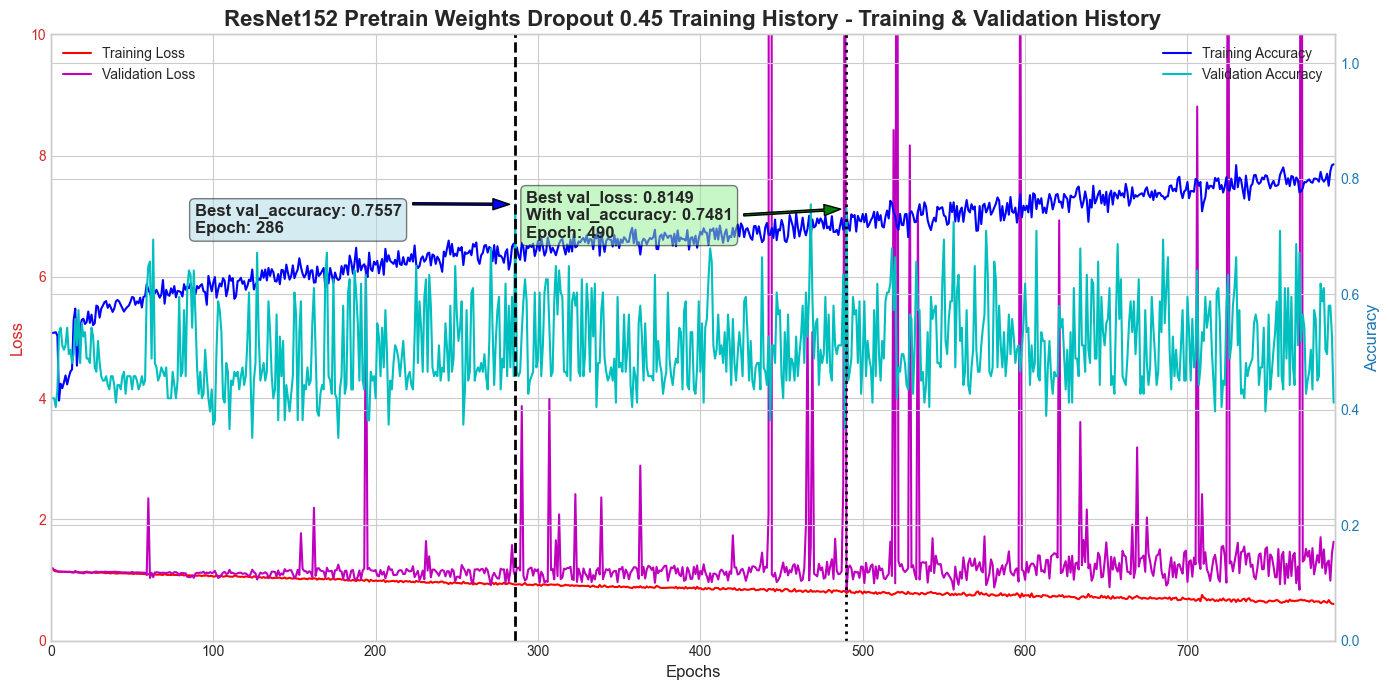

Training History Analysis for: 'ResNet152 Pretrain Weights Dropout 0.45 Training History'
Total Epochs Trained: 790
--------------------------------------------------
Lowest Validation Loss of 0.8149 achieved at Epoch 490.
Validation Accuracy at this epoch was 0.7481.
--------------------------------------------------
Highest Validation Accuracy of 0.7557 achieved at Epoch 286.
Validation Loss at this epoch was 1.0592.


In [21]:
path_to_resnet152_pretrain_weights_dropout_045_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/pretrain_fine/resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_23_14_41_27/history_resnet152_00_2cls_slice_no_clin_no_layer_gray_seq[t1c]_normal_DA_normal_run_2025_10_23_14_41_27.npy')

plot_training_history(path_to_train_history = path_to_resnet152_pretrain_weights_dropout_045_train_history,
                      title = 'ResNet152 Pretrain Weights Dropout 0.45 Training History',
                      custom_loss_limit = 10)

Also better than before, I'll pick a dropout rate of 0.45 for the k-fold training.